# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

Results found in a-0.png


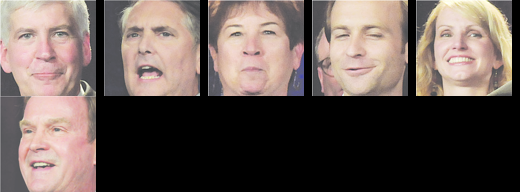

Results found in a-1.png


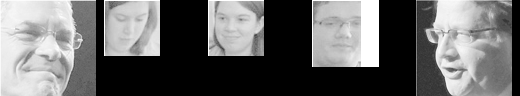

Results found in a-10.png
But there were no faces in that file!
Results found in a-13.png


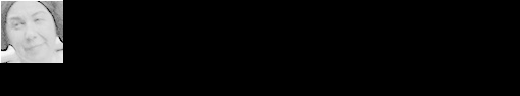

Results found in a-2.png


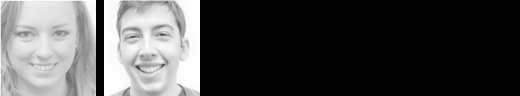

Results found in a-3.png


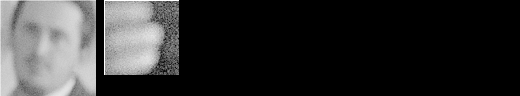

Results found in a-8.png
But there were no faces in that file!


In [7]:
# By default, this scripts will run search "Mark" in images.zip
#
# uncomment line 107 and 133 and comment line 108 and 134
# for Searching "Chistopher" in small_img.zip

import zipfile
import PIL

from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np

import pytesseract
from PIL import ImageDraw
from IPython.display import display

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')



# OCR for producing texts out of each PIL image
# parameter: img
# return text string

def myOCR(img):
#    print(img)
    img = Image.open(img)
    img = img.convert('L')
    text = pytesseract.image_to_string(img)
    return text

# display a single composited image
# parameter. images is a image list
# return None
def display_contact_sheet(images, num_of_images):
    if num_of_images % 5 == 0:
        num_height = int(num_of_images / 5)
    else:
        num_height = int(num_of_images / 5) + 1
    contact_sheet = PIL.Image.new('RGB', (104 * 5, 96 * num_height))

    x = 0
    y = 0
    size = 105, 96

    for img in images:
        img.thumbnail(size)
        contact_sheet.paste(img, (x, y))

        if x + 104 == 520:
            x = 0
            y = y + 96
        else:
            x = x + 104
    display(contact_sheet)


# producing bounding boxes from each PIL image
# parameter faces of a given image
# return the bboxes list

def show_rects(PiLimg):
    pil_img = Image.open(PiLimg).convert("RGB")

    # Set our drawing context
    drawing = ImageDraw.Draw(pil_img)
    # And plot all of the rectangles in faces
    bboxes = []

    cv_img = cv.imread(PiLimg)
    gray = cv.cvtColor(cv_img, cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    cropped_images=[]
    for x, y, w, h in faces:
        drawing.rectangle((x, y, int(x + 1.1 * w), int(y + 1.1 * h)), outline="white")
        bboxes.append([x, y, int(1.1 * w), int(1.1 * h)])
        crop_img = pil_img.crop((x, y, int(x + 1.1 * w), int(y + 1.1 * h)))

        cropped_images.append(crop_img)
    if len(cropped_images) !=0:
        return bboxes, cropped_images
    else:
        return bboxes, None

# search a string from myDBlst

def search_txt(txt, myDBlst):
    foundFiles = [aDict.keys() for aDict in myDBlst for values in aDict.values() if txt in values["texts"]]
    return foundFiles


def search_file_idx(file, myDBlst):
    idx = 0
    for ele in myDBlst:
        if str(*ele.keys()) == file:
            return idx
        idx += 1


# main function starts from here

# open zip and iterate through the list
#with zipfile.ZipFile('readonly/small_img.zip') as myzip:
with zipfile.ZipFile('readonly/images.zip') as myzip:
    images = []
    filelst = []
    for i in range(len(myzip.infolist())):
        myzip.extract(myzip.infolist()[i].filename)
        image = Image.open(myzip.infolist()[i].filename)
        images.append(image)
        filelst.append(myzip.infolist()[i].filename)

# create database, which is a list of dictionaries, which is nested.
# keys: filenames
# values: BBox: area
# values: texts: whole texts
myDBlst = []
myDict = {}

search_found_images=[]

for i in range(len(images)):
    myDict[filelst[i]] = {}
    myDict[filelst[i]]['BBox'],search_found_image = show_rects(filelst[i])
    myDict[filelst[i]]['texts'] = myOCR(filelst[i])
    myDBlst.append({filelst[i]: myDict[filelst[i]]})
    search_found_images.append(search_found_image)

#found = search_txt("Christopher", myDBlst)
found =search_txt("Mark",myDBlst)

search_found_image_dictionary= dict(zip(filelst,search_found_images))

for ele in found:
    #    print(ele)
    print("Results found in {}".format(*ele))
    aa = str(*ele)
    idx = search_file_idx(aa, myDBlst)
    if not search_found_image_dictionary[aa]:
        print("But there were no faces in that file!")
    else:
        display_contact_sheet(search_found_image_dictionary[aa], len(search_found_image_dictionary[aa]))